In [1]:
import pandas as pd
from tqdm import tqdm

# Load the dataset
all_data = pd.read_csv('all_redshifted_data.csv')

# Identify the flux columns (assuming they are named like 'Flux_XXXX.X')
flux_columns = [col for col in all_data.columns if col.startswith('Flux_')]

# Filter columns for the 4700 to 4750 angstrom range
specific_flux_columns = [col for col in flux_columns if 4700 <= float(col.split('_')[1]) <= 4750]

# Columns to be standardized by column
column_standardize = ['logMBH', 'e_logMBH', 'LogREdd']

# Prepare the DataFrame for storing standardized data
standardised_data = all_data.copy()

# Prepare a dictionary to store statistics
statistics = {
    'Mean_Std_Row': [],  # To store mean and std for each row for flux columns
    'Mean_Std_Col': {}   # To store mean and std for each specified column
}

# Normalizing each row across the specified flux columns
for index, row in tqdm(standardised_data.iterrows(), total=standardised_data.shape[0], desc="Standardizing Flux"):
    flux_values = row[flux_columns]
    mean_flux_values = row[specific_flux_columns]
    mean = mean_flux_values.mean() #mean between 4700 and 4750 angstroms 
    std = flux_values.std() #standard deviation for the whole width 

    # Store row statistics
    statistics['Mean_Std_Row'].append((mean, std))

    # Avoid division by zero
    if std != 0:
        standardised_data.loc[index, flux_columns] = (flux_values - mean) / std

# Prepare a dictionary to store statistics
statistics = {
    'Mean_Std_Col': {}   # To store mean and std for each specified column
}

# Normalizing each specified column across all rows with tqdm for progress indication
for column in tqdm(column_standardize, desc="Standardizing Columns"):
    values = standardised_data[column]
    mean = values.mean()
    std = values.std()

    # Store column statistics
    statistics['Mean_Std_Col'][column] = {'Mean': mean, 'Std': std}

    # Avoid division by zero
    if std > 0:
        standardised_data[column] = (values - mean) / std
    else:
        # Handle the case where the standard deviation is zero
        standardised_data[column] = values - mean  # or set to 0 if that makes more sense in your context

# Save the standardized data to a new CSV file
standardised_data.to_csv('H-Beta-standardised_data.csv', index=False)

# Optionally, you can save the statistics to a file or use them further
# For example, saving to a CSV file
stats_df = pd.DataFrame.from_dict(statistics['Mean_Std_Col'], orient='index')
stats_df.to_csv('statistics.csv')

# If you need to see the statistics:
pd.DataFrame(statistics)

Standardizing Columns: 100%|██████████████████████| 3/3 [00:00<00:00, 19.41it/s]


,Mean_Std_Col
LogREdd,"{'Mean': -1.0662151870166816, 'Std': 0.4744156..."
e_logMBH,"{'Mean': 0.642554864687731, 'Std': 14.40072591..."
logMBH,"{'Mean': 8.170413764191869, 'Std': 0.541829401..."


In [4]:
standardised_data.head()

,Plate,MJD,Fiber,z,logMBH,e_logMBH,LogREdd,Flux_4662.7,Flux_4663.7,Flux_4664.7,...,Flux_5052.7,Flux_5053.7,Flux_5054.7,Flux_5055.7,Flux_5056.7,Flux_5057.7,Flux_5058.7,Flux_5059.7,Flux_5060.7,Flux_5061.7
0,7238.0,56660.0,44.0,0.730000,-0.040101,-0.026869,-0.212868,1.112626,0.366013,0.063948,...,-0.979802,-0.760767,-0.216698,-0.229042,-0.578168,-0.326373,-0.088885,-0.320320,0.013622,0.241127
1,5134.0,55868.0,129.0,0.755000,0.874615,-0.025569,-0.351972,-0.164687,0.493759,-0.205353,...,-0.194597,-0.089942,0.164750,0.362761,-0.023143,-0.519382,-0.272150,0.358163,-1.424520,-1.288566
2,7038.0,56571.0,596.0,0.694000,0.323946,-0.034800,0.412485,0.320269,0.240381,0.046075,...,-0.070997,-0.125162,0.046531,-0.189631,-0.252304,-0.090921,-0.055777,-0.105531,-0.182449,-0.330766
3,6267.0,56279.0,189.0,0.739000,0.874508,-0.033277,-0.547488,0.003897,-0.003096,0.161120,...,-0.690531,-1.022174,-0.008676,-0.282379,0.299969,0.275252,0.098464,0.237730,0.134758,-0.604028
4,7902.0,57362.0,586.0,0.245966,0.306865,-0.042962,-0.186806,0.102169,0.044721,0.040850,...,-0.158994,-0.136633,-0.097810,-0.351321,-0.183374,-0.146938,-0.164195,-0.160924,-0.176358,-0.250992


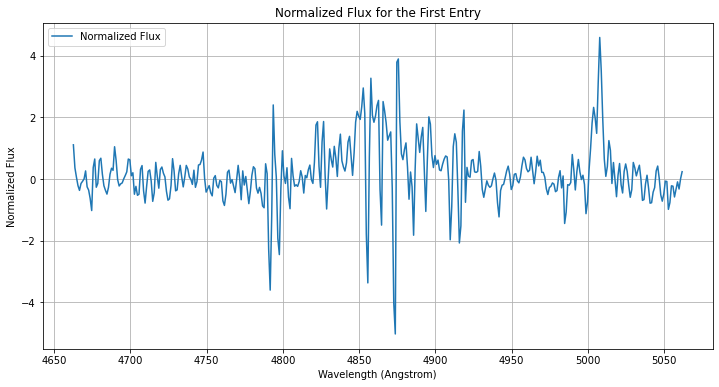

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the normalized data
normalized_data = pd.read_csv('H-Beta-standardised_data.csv')

# Assuming the first column is an identifier and the rest are flux values at different wavelengths
# If you have specific column names for wavelengths, adjust the indexing accordingly
flux_columns = [col for col in normalized_data.columns if col.startswith('Flux_')]
wavelengths = [float(col.split('_')[1]) for col in flux_columns]  # Extract wavelengths from column names

# Get the flux values for the first entry
flux_values = normalized_data.loc[0, flux_columns]

# Plotting the spectrum
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, flux_values, label='Normalized Flux')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Flux for the First Entry')
plt.grid(True)
plt.legend()
plt.show()

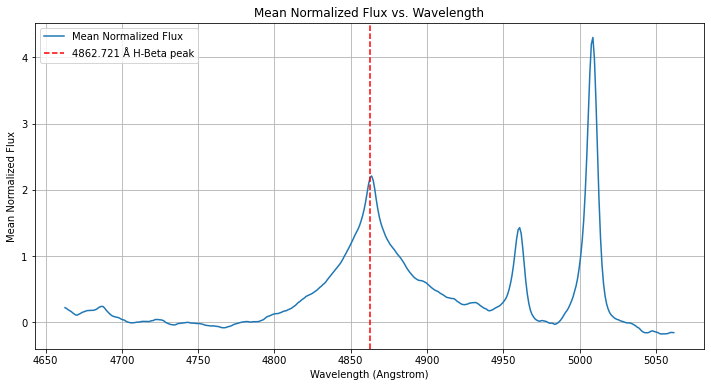

In [4]:
###THE MEAN AVERAGE
###CLEAR PEAK AROUND 4862.721Å

# Identify the flux columns (assuming they are named like 'Flux_XXXX.X')
import matplotlib.pyplot as plt

flux_columns = [col for col in normalized_data.columns if col.startswith('Flux_')]
wavelengths = [float(col.split('_')[1]) for col in flux_columns]
mean_flux = normalized_data[flux_columns].mean()

# Find the maximum point
max_flux = mean_flux.max()
max_wavelength = wavelengths[mean_flux.argmax()]

# Plotting the mean flux against the wavelength
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, mean_flux, label='Mean Normalized Flux')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Mean Normalized Flux')
plt.title('Mean Normalized Flux vs. Wavelength')
plt.grid(True)

# Add a vertical line at 4862.721 Angstroms
plt.axvline(x=4862.721, color='red', linestyle='--', label='4862.721 Å H-Beta peak')
plt.legend()
plt.savefig('mean standardised flux vs wavelength.pdf', dpi=600)
plt.show()


/var/folders/ch/wn8vr5sd39z73l13gyfsrjkw0000gn/T/ipykernel_32563/1817224039.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


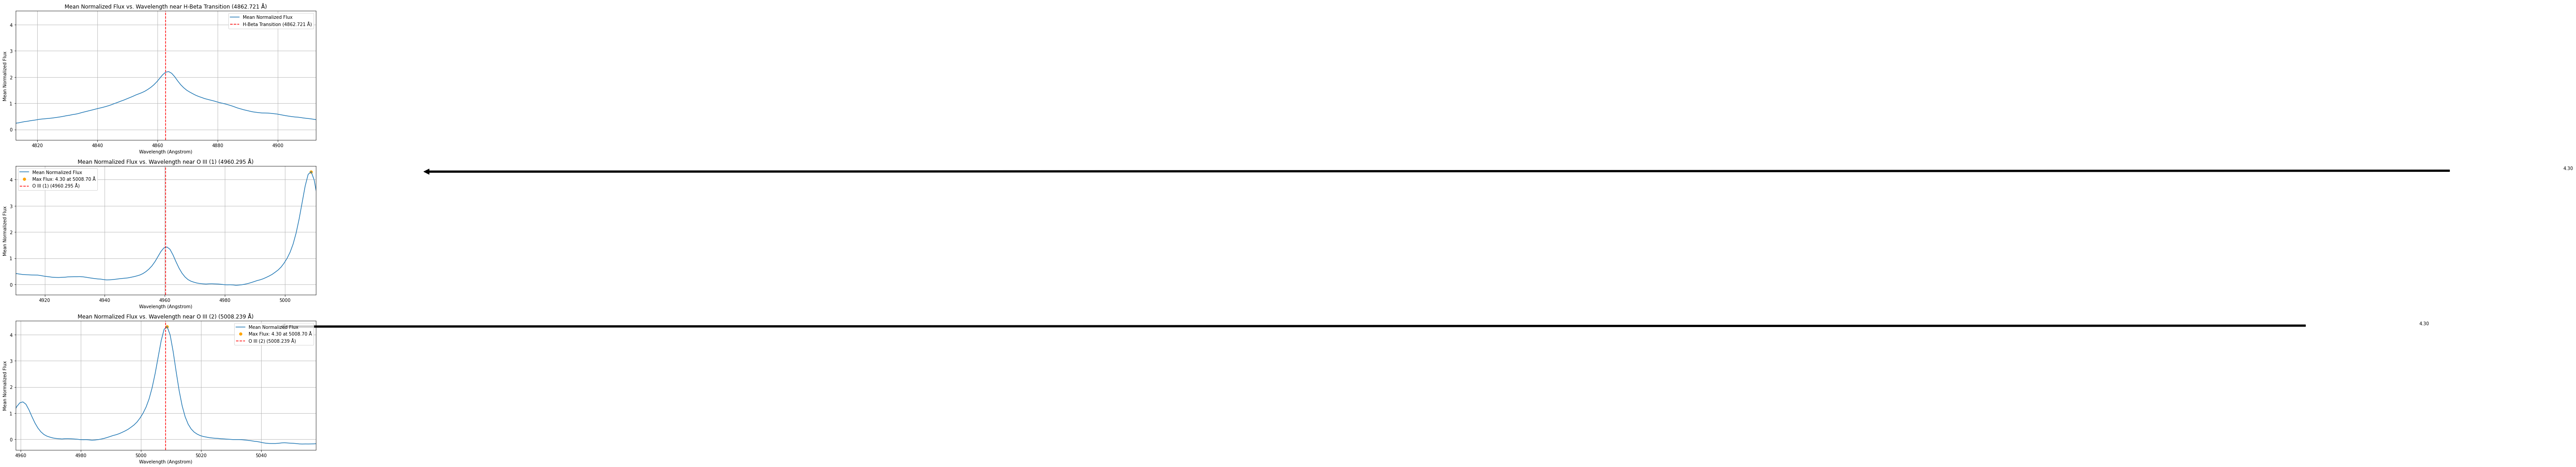

In [5]:
import matplotlib.pyplot as plt

# Define wavelengths and mean flux
flux_columns = [col for col in normalized_data.columns if col.startswith('Flux_')]
wavelengths = [float(col.split('_')[1]) for col in flux_columns]
mean_flux = normalized_data[flux_columns].mean()

# Define the spectral lines and their midpoints
spectral_lines = {
    'H-Beta Transition (4862.721 Å)': 4862.721,
    'O III (1) (4960.295 Å)': 4960.295,
    'O III (2) (5008.239 Å)': 5008.239
}

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Iterate over each subplot and spectral line
for ax, (line, center) in zip(axes, spectral_lines.items()):
    # Zoom in around the line +/- 50 Å
    ax.plot(wavelengths, mean_flux, label='Mean Normalized Flux')
    ax.set_xlim(center - 50, center + 50)
    ax.set_xlabel('Wavelength (Angstrom)')
    ax.set_ylabel('Mean Normalized Flux')
    ax.set_title(f'Mean Normalized Flux vs. Wavelength near {line}')
    ax.grid(True)

    # Mark the maximum point if within the current subplot's range
    max_flux = mean_flux.max()
    max_wavelength = wavelengths[mean_flux.argmax()]
    if center - 50 <= max_wavelength <= center + 50:
        ax.scatter(max_wavelength, max_flux, color='orange', label=f'Max Flux: {max_flux:.2f} at {max_wavelength:.2f} Å')
        ax.annotate(f'{max_flux:.2f}', xy=(max_wavelength, max_flux), xytext=(max_wavelength+10, max_flux),
                    arrowprops=dict(facecolor='black', shrink=0.05), textcoords="offset points", xycoords='data')

    # Add a vertical line at the center wavelength
    ax.axvline(x=center, color='red', linestyle='--', label=f'{line}')
    ax.legend()

plt.tight_layout()
plt.show()
